# Example graph: Plotting image data

### Imports

In [2]:
import numpy as np
import qplot as qp

### Preparing the data

(Here we just make up some data for the demonstration.)


In [13]:
np.random.seed(1234567)
whitenoise = np.random.randn(256, 256)
ft_arr = np.fft.fftshift(np.fft.fft2(whitenoise))
xx, yy = np.mgrid[0:ft_arr.shape[0], 0:ft_arr.shape[1]]
f = np.hypot(xx - ft_arr.shape[0] / 2, yy - ft_arr.shape[1] / 2)
pink_ft_arr = ft_arr / (1 + f**1.5)
pink_ft_arr = np.nan_to_num(pink_ft_arr, nan=0, posinf=0, neginf=0) 
pinknoise = np.fft.ifft2(np.fft.ifftshift(pink_ft_arr)).real
zz = pinknoise
zz = zz / np.std(zz)

### Plotting

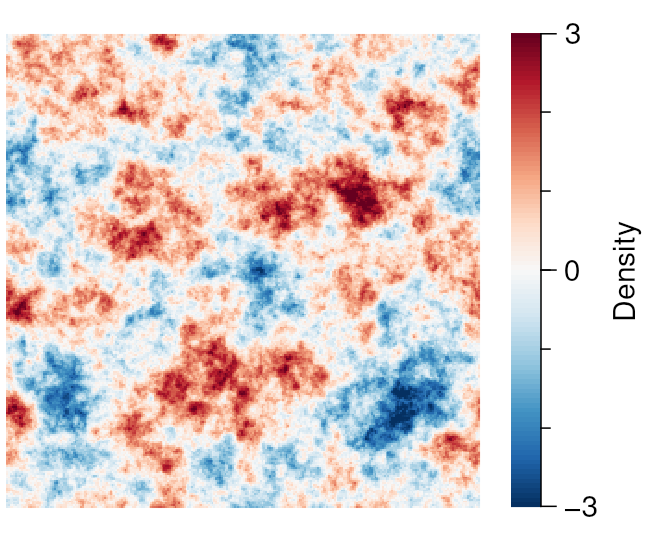

In [15]:
qp.figure('eg_imsc', 3, 2.5)

# Choice a look-up table (palette)
qp.luts.set('RdBu', 100, reverse=True)

# Plot the image
qp.imsc(zz, xx=xx, yy=yy, c0=-3, c1=3)

# Adda color bar
qp.cbar(256, 0, 256)

# Draw a coordinate axis along the color bar
qp.caxis('Density', qp.arange(-3, 3, 3), ticklen=5)
qp.minorticks(qp.arange(-2, 2, 1), ticklen=3)

# Ensure annotations fit inside bounding box while preserving aspect ratio
qp.shrink(ratio=1)
